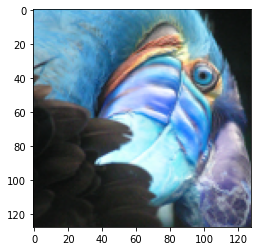

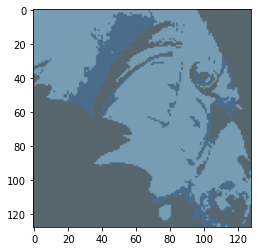

In [43]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
import random

np.random.seed(1)



img = cv2.imread('input.png')
height, width, channels = np.shape(img)

imgplot = plt.imshow(img)
plt.show()

distances = [0, 0, 0]
clusters = [[], [], []]


X = img.reshape(img.shape[0]*img.shape[1],3)

centroids = random.sample(list(X), 3)


for i in range(25):

    for i in range(width):
        for j in range(height):
            pixel = img[j][i] 
            
            for h in range(3):
                distances[h] = np.linalg.norm(centroids[h] - pixel)
            
            # assigns the min distance to it's appropriate cluster
            dist_min = np.min(distances)
            dist_min_index = distances.index(dist_min)
            clusters[dist_min_index].append(pixel)
            
            
            
# sets the new centroid value equal to the mean of the respective cluster
for i in range(3):
    centroids[i] = np.mean(np.array(clusters[i]), axis=0)


for i in range(width):
    for j in range(height):
        
            pixel = img[j][i]

            for h in range(3):
                distances[h] = np.linalg.norm(centroids[h] - pixel)
            
            # assigns the new centroid mean value to each pixel
            dist_min = np.min(distances)
            dist_min_index = distances.index(dist_min)
            img[j][i] = centroids[dist_min_index]
            
            

imgplot = plt.imshow(img)
plt.show()

# cv2.imwrite('output.png', img)


# https://github.com/Adioosin/image-compression-using-k-mean/blob/master/Image%20compression%20using%20K-Mean%20algorithm.ipynb